In [1]:
import pandas as pd

# The data is downloaded from https://wcc.sc.egov.usda.gov/reportGenerator/view/customGroupByMonthReport/monthly/679:wa:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END:1,2,3,4,5,6/WTEQ::collectionDate,SNWD::value,WTEQ::value

# Replace 'path/to/file.csv' with the actual path to your CSV file
df = pd.read_csv('paradise.csv')

# Print the first 5 rows of the DataFrame
print(df.head())

   Water Year                                                Jan  \
0         NaN  Snow Water Equivalent Collection Date Start of...   
1      1981.0                                                NaN   
2      1982.0                                                NaN   
3      1983.0                                                NaN   
4      1984.0                                                NaN   

                                   Jan.1  \
0  Snow Depth (in) Start of Month Values   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

                                              Jan.2  \
0  Snow Water Equivalent (in) Start of Month Values   
1                                              13.3   
2                                               NaN   
3                                               NaN   
4                                              37.5

In [2]:
df.shape


(44, 19)

In [3]:
df.columns

Index(['Water Year', 'Jan', 'Jan.1', 'Jan.2', 'Feb', 'Feb.1', 'Feb.2', 'Mar',
       'Mar.1', 'Mar.2', 'Apr', 'Apr.1', 'Apr.2', 'May', 'May.1', 'May.2',
       'Jun', 'Jun.1', 'Jun.2'],
      dtype='object')

In [4]:
# Fill in empty values
df['Water Year'].fillna(1970, inplace=True)
df['Water Year'] = df['Water Year'].astype(int)
print(df['Water Year'])

0     1970
1     1981
2     1982
3     1983
4     1984
5     1985
6     1986
7     1987
8     1988
9     1989
10    1990
11    1991
12    1992
13    1993
14    1994
15    1995
16    1996
17    1997
18    1998
19    1999
20    2000
21    2001
22    2002
23    2003
24    2004
25    2005
26    2006
27    2007
28    2008
29    2009
30    2010
31    2011
32    2012
33    2013
34    2014
35    2015
36    2016
37    2017
38    2018
39    2019
40    2020
41    2021
42    2022
43    2023
Name: Water Year, dtype: int32


In [6]:
# For each row, only select the SWE column for each month
df_small = df.iloc[:, [0, 3, 6, 9, 12, 15, 18]].copy()
df_small.iloc[1:, 1:] = df_small.iloc[1:, 1:].astype(float).fillna(0.0)


In [7]:
# Show the column names
df_small.head()

,Water Year,Jan.2,Feb.2,Mar.2,Apr.2,May.2,Jun.2
0,1970,Snow Water Equivalent (in) Start of Month Values,Snow Water Equivalent (in) Start of Month Values,Snow Water Equivalent (in) Start of Month Values,Snow Water Equivalent (in) Start of Month Values,Snow Water Equivalent (in) Start of Month Values,Snow Water Equivalent (in) Start of Month Values
1,1981,13.3,13.5,26.4,33.3,38.9,25.5
2,1982,0,0,0,0,0,0
3,1983,0,0,0,0,0,0
4,1984,37.5,48.7,43.1,56.5,66.1,65.9


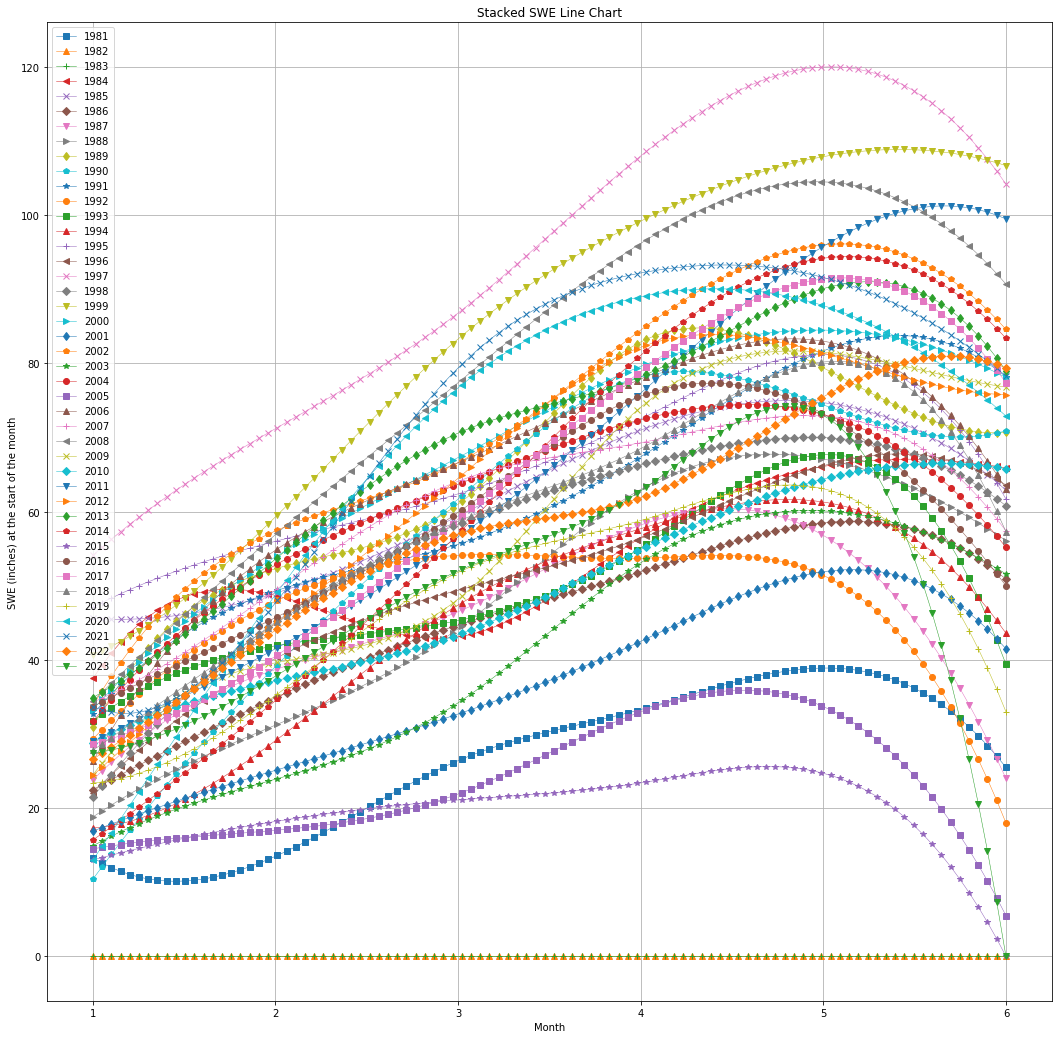

In [297]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline


# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 18))

markers = ['o', 's', '^', '+', '<', 'x', 'D', 'v', '>', 'd', 'p', '*']

# Plot stacked lines:
for i in range(1, df_small.shape[0]):
    x = range(1, df_small.shape[1])
    x_new = np.linspace(min(x), max(x), 100)
    y = df_small.iloc[i, 1:]
    spl = make_interp_spline(x, y, k=3)  # type: BSpline
    y_smooth = spl(x_new)
    ax.plot(x_new, y_smooth, label=df_small.iloc[i, 0], marker=markers[i % len(markers)], linewidth=0.5)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('SWE (inches) at the start of the month')
ax.set_title('Stacked SWE Line Chart')

# Add a legend
ax.legend()

plt.grid(True)
# Show the plot
plt.show()